<a href="https://colab.research.google.com/github/lucaspinheiro27/Deep_Learning_AI/blob/main/Redes_Neurais_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("gs_dataframe.csv", sep=',', encoding='latin1')
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat,Presença de Algas,Nível de Poluição
0,16.46,35.77,75.64,8.09,0,Recife de Coral,Sim,Médio
1,18.50,33.55,59.24,7.96,1,Mangue,Não,Baixo
2,24.51,36.41,11.89,8.34,1,Plataforma Continental,Sim,Alto
3,17.20,37.62,22.95,7.69,1,Recife de Coral,Não,Baixo
4,23.39,38.73,44.22,7.88,1,Mangue,Sim,Médio
...,...,...,...,...,...,...,...,...
89,24.20,32.90,38.60,8.16,1,Plataforma Continental,Sim,Alto
90,13.40,38.00,96.30,7.98,0,Recife de Coral,Não,Médio
91,22.60,34.40,33.20,8.14,1,Mangue,Sim,Baixo
92,30.10,39.20,44.60,8.31,1,Plataforma Continental,Não,Alto


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura da Água (°C)     94 non-null     float64
 1   Salinidade (ppt)             94 non-null     float64
 2   Profundidade (m)             94 non-null     float64
 3   pH                           94 non-null     float64
 4   Presença de Espécie Marinha  94 non-null     int64  
 5   Tipo de Habitat              94 non-null     object 
 6   Presença de Algas            94 non-null     object 
 7   Nível de Poluição            94 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ KB


In [ ]:
df.isna().sum()

Temperatura da Água (°C)       0
Salinidade (ppt)               0
Profundidade (m)               0
pH                             0
Presença de Espécie Marinha    0
Tipo de Habitat                0
Presença de Algas              0
Nível de Poluição              0
dtype: int64

In [ ]:
!pip install skimpy

In [ ]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 94     │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Temperatura da Água    │   0 │     0 │   20.43 │    5.74 │  10.25 │  15.53 │ 20.69 │ 25.18 │   31 │ ▇▇▇▇▇▅ │  │
│ │ (°C)                   │     │       │         │         │        │        │       │       │      │        │  │
│ │ Salinidade (ppt)       │   0 │     0 │   35.42 │   2.373 │  31.22 │  33.51 │ 35.29 │  37.2 │ 40.1 │ ▅▇▇▇▆▃ │  │
│ │ Profundidade (m)       │   0 │     0 │   47.11 │   23.82 │  10.53 │  27.69 │ 44.41 │ 63.41 │ 96.3 │ ▇▇▆▅▅▃ │  │
│ │ pH                     │   0 │     0 │   8.056 │  0.2017 │   7.65 │  7.893 │  8.04 │ 8.215 │  8.5 │ ▃▇▇▇▆▂ │  │
│ │ Presença de Espécie    │   0 │     0 │  0.5745 │  0.4971 │      0 │      0 │     1 │     1 │    1 │ ▆    ▇ │  │
│ │ Marinha                │     │       │         │         │        │        │       │       │      │        │  │
│ └────────────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tipo de Habitat                   │      0 │         0 │                         2 │                   189 │  │
│ │ Presença de Algas                 │      0 │         0 │                         1 │                    94 │  │
│ │ Nível de Poluição                 │      0 │         0 │                         1 │                    94 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
df = pd.get_dummies(df, columns=['Tipo de Habitat', 'Presença de Algas',  'Nível de Poluição'])
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,16.46,35.77,75.64,8.09,0,False,False,True,False,True,False,False,True
1,18.50,33.55,59.24,7.96,1,True,False,False,True,False,False,True,False
2,24.51,36.41,11.89,8.34,1,False,True,False,False,True,True,False,False
3,17.20,37.62,22.95,7.69,1,False,False,True,True,False,False,True,False
4,23.39,38.73,44.22,7.88,1,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.20,32.90,38.60,8.16,1,False,True,False,False,True,True,False,False
90,13.40,38.00,96.30,7.98,0,False,False,True,True,False,False,False,True
91,22.60,34.40,33.20,8.14,1,True,False,False,False,True,False,True,False
92,30.10,39.20,44.60,8.31,1,False,True,False,True,False,True,False,False


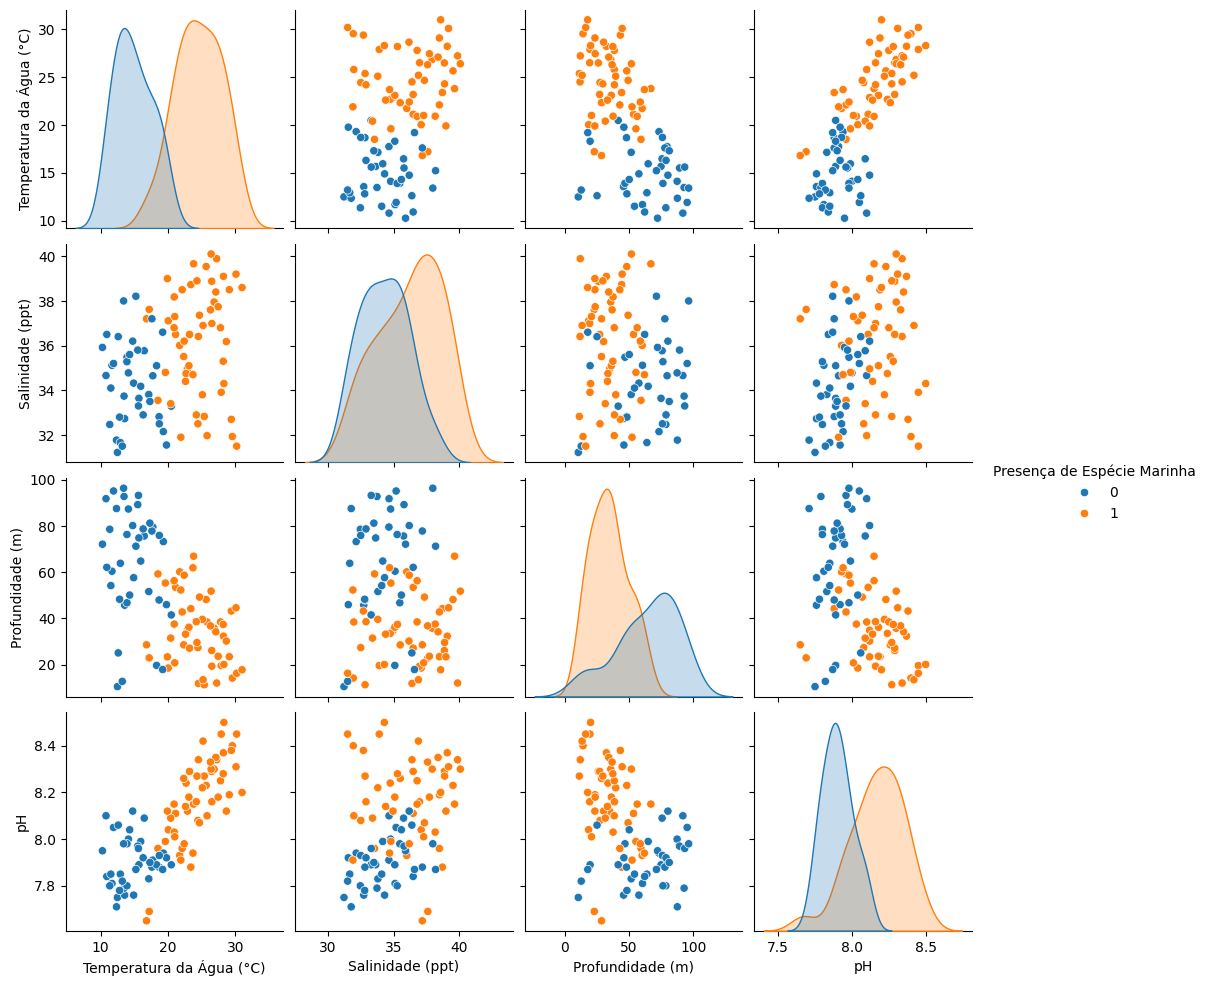

In [ ]:
import seaborn as sb
sb.pairplot(df[['Temperatura da Água (°C)','Salinidade (ppt)','Profundidade (m)','pH',	'Presença de Espécie Marinha']], hue='Presença de Espécie Marinha')

In [ ]:
from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [ ]:
def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

In [ ]:
# Chamando a função para verificar normalidade
for coluna in ['Temperatura da Água (°C)','Salinidade (ppt)','Profundidade (m)','pH']:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

A coluna 'Temperatura da Água (°C)' não segue uma distribuição normal
A coluna 'Salinidade (ppt)' não segue uma distribuição normal
A coluna 'Profundidade (m)' não segue uma distribuição normal
A coluna 'pH' segue uma distribuição normal


In [ ]:
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,0.299277,0.512387,0.759123,0.169707,0,False,False,True,False,True,False,False,True
1,0.397590,0.262387,0.567914,-0.478360,1,True,False,False,True,False,False,True,False
2,0.687229,0.584459,0.015856,1.415989,1,False,True,False,False,True,True,False,False
3,0.334940,0.720721,0.144806,-1.824346,1,False,False,True,True,False,False,True,False
4,0.633253,0.845721,0.392795,-0.877171,1,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.672289,0.189189,0.327271,0.518666,1,False,True,False,False,True,True,False,False
90,0.151807,0.763514,1.000000,-0.378658,0,False,False,True,True,False,False,False,True
91,0.595181,0.358108,0.264312,0.418963,1,True,False,False,False,True,False,True,False
92,0.956627,0.898649,0.397225,1.266435,1,False,True,False,True,False,True,False,False


In [ ]:
saídas = df.loc[:,'Presença de Espécie Marinha']
saidas = pd.DataFrame(saídas)
saidas

,Presença de Espécie Marinha
0,0
1,1
2,1
3,1
4,1
...,...
89,1
90,0
91,1
92,1


In [ ]:
colunas = ['Temperatura da Água (°C)', 'Salinidade (ppt)', 'Profundidade (m)', 'pH', 'Tipo de Habitat_Mangue',	'Tipo de Habitat_Plataforma Continental',	'Tipo de Habitat_Recife de Coral',	'Presença de Algas_Não',	'Presença de Algas_Sim',	'Nível de Poluição_Alto',	'Nível de Poluição_Baixo',	'Nível de Poluição_Médio']
entradas = df[colunas]
entradas = pd.DataFrame(entradas)
entradas

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,0.299277,0.512387,0.759123,0.169707,False,False,True,False,True,False,False,True
1,0.397590,0.262387,0.567914,-0.478360,True,False,False,True,False,False,True,False
2,0.687229,0.584459,0.015856,1.415989,False,True,False,False,True,True,False,False
3,0.334940,0.720721,0.144806,-1.824346,False,False,True,True,False,False,True,False
4,0.633253,0.845721,0.392795,-0.877171,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.672289,0.189189,0.327271,0.518666,False,True,False,False,True,True,False,False
90,0.151807,0.763514,1.000000,-0.378658,False,False,True,True,False,False,False,True
91,0.595181,0.358108,0.264312,0.418963,True,False,False,False,True,False,True,False
92,0.956627,0.898649,0.397225,1.266435,False,True,False,True,False,True,False,False


In [ ]:
num_linhas_entradas = len(entradas)
num_colunas_entradas = len(entradas.columns)
print("Número de linhas:", num_linhas_entradas)
print("Número de colunas:", num_colunas_entradas)

Número de linhas: 94
Número de colunas: 12


In [ ]:
num_linhas_saidas = len(saidas)
num_colunas_saidas = len(saidas.columns)
print("Número de linhas:", num_linhas_saidas)
print("Número de colunas:", num_colunas_saidas)

Número de linhas: 94
Número de colunas: 1


In [ ]:
n_neuronios = num_colunas_entradas + num_colunas_saidas / 2
n_neuronios

12.5

In [ ]:
n_neuronios = num_colunas_entradas * 2/3 + num_colunas_saidas
n_neuronios

9.0

In [ ]:
if n_neuronios < 2 * num_colunas_entradas:
    print("n_neuronios é menor que o dobro de num_colunas_entradas")
else:
    print("n_neuronios não é menor que o dobro de num_colunas_entradas")
n_neuronios

n_neuronios é menor que o dobro de num_colunas_entradas


9.0

In [ ]:
redeneural = MLPClassifier(
    verbose=True,
    max_iter=5000,
    tol=0.000001,
    activation='relu',
    hidden_layer_sizes=(9, 9),
    learning_rate_init=0.0001
)

In [ ]:
redeneural.fit(entradas, saidas)

Iteration 1, loss = 0.81888880
Iteration 2, loss = 0.81830843
Iteration 3, loss = 0.81772766
Iteration 4, loss = 0.81714723
Iteration 5, loss = 0.81656680
Iteration 6, loss = 0.81598696
Iteration 7, loss = 0.81540773
Iteration 8, loss = 0.81482913
Iteration 9, loss = 0.81425117
Iteration 10, loss = 0.81367388
Iteration 11, loss = 0.81309938
Iteration 12, loss = 0.81252589
Iteration 13, loss = 0.81195313
Iteration 14, loss = 0.81138109
Iteration 15, loss = 0.81080980
Iteration 16, loss = 0.81023924
Iteration 17, loss = 0.80966401
Iteration 18, loss = 0.80908761
Iteration 19, loss = 0.80851203
Iteration 20, loss = 0.80793841
Iteration 21, loss = 0.80736538
Iteration 22, loss = 0.80679298
Iteration 23, loss = 0.80622122
Iteration 24, loss = 0.80565013
Iteration 25, loss = 0.80507980
Iteration 26, loss = 0.80451024
Iteration 27, loss = 0.80394204
Iteration 28, loss = 0.80337479
Iteration 29, loss = 0.80280832
Iteration 30, loss = 0.80224264
Iteration 31, loss = 0.80167769
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 106, loss = 0.76100349
Iteration 107, loss = 0.76048252
Iteration 108, loss = 0.75996225
Iteration 109, loss = 0.75944142
Iteration 110, loss = 0.75892181
Iteration 111, loss = 0.75840214
Iteration 112, loss = 0.75788265
Iteration 113, loss = 0.75736359
Iteration 114, loss = 0.75684501
Iteration 115, loss = 0.75632692
Iteration 116, loss = 0.75580934
Iteration 117, loss = 0.75529232
Iteration 118, loss = 0.75477585
Iteration 119, loss = 0.75425995
Iteration 120, loss = 0.75374463
Iteration 121, loss = 0.75322991
Iteration 122, loss = 0.75271579
Iteration 123, loss = 0.75220228
Iteration 124, loss = 0.75168892
Iteration 125, loss = 0.75117590
Iteration 126, loss = 0.75066425
Iteration 127, loss = 0.75015319
Iteration 128, loss = 0.74964275
Iteration 129, loss = 0.74913292
Iteration 130, loss = 0.74862372
Iteration 131, loss = 0.74811514
Iteration 132, loss = 0.74760720
Iteration 133, loss = 0.74709989
Iteration 134, loss = 0.74659321
Iteration 135, loss = 0.74608583
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(9, 9), learning_rate_init=0.0001,
              max_iter=5000, tol=1e-06, verbose=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = df['Presença de Espécie Marinha']
X = df.drop('Presença de Espécie Marinha', axis=1)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test)

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Erro mínimo: 0.0 no K = 1


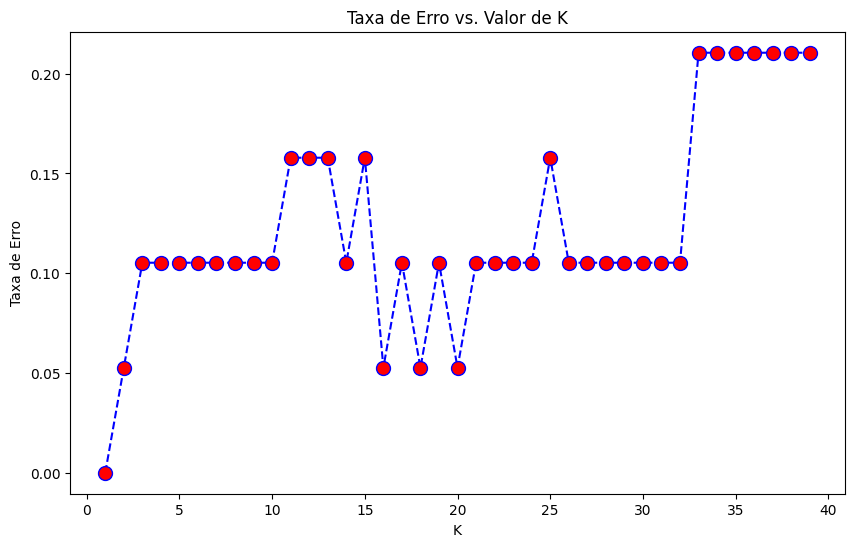

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
req_k_value = error_rate.index(min(error_rate))+1
print("Erro mínimo:",min(error_rate),"no K =",req_k_value)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k_range = range(1, 31)
k_scores = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [ ]:
best_k = k_range[np.argmax(k_scores)]
print(f'Melhor valor de k: {best_k}')
print(f'Acurácia com k={best_k}: {max(k_scores)}')

Melhor valor de k: 1
Acurácia com k=1: 0.9788888888888889


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

# Treinar o modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

Acurácia do modelo KNN: 0.9473684210526315


In [ ]:
print("n=",len(y))
print("k=", (len(y))**0.5)

n= 94
k= 9.695359714832659


In [ ]:
for k in range(3, 51, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Treinar o modelo kNN
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia para k={k}:", accuracy)

Acurácia para k=3: 0.7894736842105263
Acurácia para k=5: 0.7894736842105263
Acurácia para k=7: 0.7894736842105263
Acurácia para k=9: 0.7368421052631579
Acurácia para k=11: 0.8421052631578947
Acurácia para k=13: 0.8947368421052632
Acurácia para k=15: 0.8421052631578947
Acurácia para k=17: 0.9473684210526315
Acurácia para k=19: 0.9473684210526315
Acurácia para k=21: 0.9473684210526315
Acurácia para k=23: 1.0
Acurácia para k=25: 1.0
Acurácia para k=27: 0.9473684210526315
Acurácia para k=29: 0.8421052631578947
Acurácia para k=31: 0.8421052631578947
Acurácia para k=33: 0.7894736842105263
Acurácia para k=35: 0.7894736842105263
Acurácia para k=37: 0.7894736842105263
Acurácia para k=39: 0.7894736842105263
Acurácia para k=41: 0.7894736842105263
Acurácia para k=43: 0.7894736842105263
Acurácia para k=45: 0.8421052631578947
Acurácia para k=47: 0.8421052631578947
Acurácia para k=49: 0.8947368421052632


In [ ]:
# Selecionar o primeiro exemplo do conjunto de teste
exemplo = X_test.iloc[[0]]
saida_real = y_test.iloc[0]

# Fazer a previsão com o modelo treinado
previsao = knn.predict(exemplo)

# Imprimir a previsão e a saída real
print("Previsão:", previsao[0])
print("Saída Real:", saida_real)

Previsão: 1
Saída Real: 1


In [ ]:
previsoes = knn.predict(X_test)

# Criar um DataFrame para comparar as previsões com as saídas reais
comparacao = pd.DataFrame({'Previsão': previsoes, 'Saída Real': y_test})

# Mostrar o DataFrame de comparação
comparacao

,Previsão,Saída Real
40,1,1
22,1,1
55,1,1
72,0,0
0,1,0
26,1,1
39,0,0
67,1,1
10,0,0
44,1,1


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def draw_nn_3d(layers, title):
    G = nx.Graph()
    pos = {}
    layer_gap = 10
    node_gap = 3

    for i, layer_size in enumerate(layers):
        y = -(layer_size - 1) * node_gap / 2  # Centraliza os nós da camada
        for j in range(layer_size):
            node_id = f"L{i+1}_N{j+1}"
            G.add_node(node_id, layer=i)
            pos[node_id] = (i * layer_gap, y + j * node_gap, 0)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    colors = plt.cm.viridis(np.linspace(0, 1, len(layers)))

    for i in range(len(layers)):
        layer_color = colors[i]
        for j in range(layers[i]):
            node_id = f"L{i+1}_N{j+1}"
            ax.scatter(*pos[node_id], c=[layer_color], s=100, edgecolors='k')
            ax.text(*pos[node_id], f'{i+1}-{j+1}', color='black', fontsize=8, ha='center', va='center')

    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                source = f"L{i+1}_N{j+1}"
                target = f"L{i+2}_N{k+1}"
                ax.plot([pos[source][0], pos[target][0]], [pos[source][1], pos[target][1]], [pos[source][2], pos[target][2]], c='gray', alpha=0.5)

    ax.set_xlabel('Layer')
    ax.set_ylabel('Nodes')
    ax.set_zlabel('Z')
    ax.set_title(title)

    plt.show()

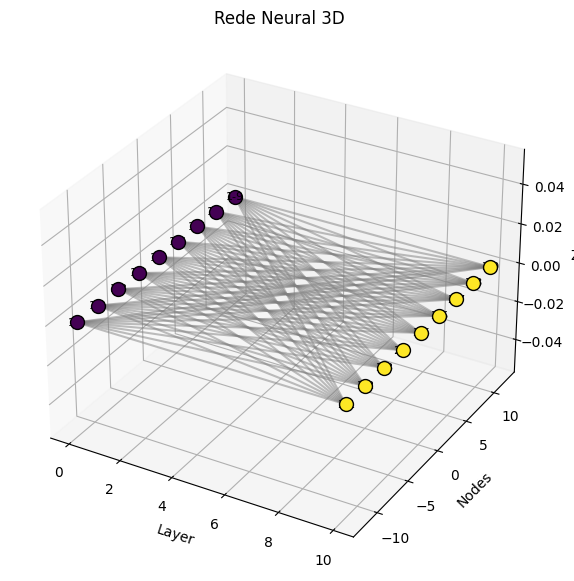

In [ ]:
hidden_layer_sizes = [9, 9]
title = "Rede Neural 3D"
draw_nn_3d(hidden_layer_sizes, title)